# Handwritten Digits Detection
---
Marco Sanguineti, November 2021

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)

2.6.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
try:
  !nvidia-smi
except Exception as e:
  print(e)

zsh:1: command not found: nvidia-smi


In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train[0].shape

(28, 28)

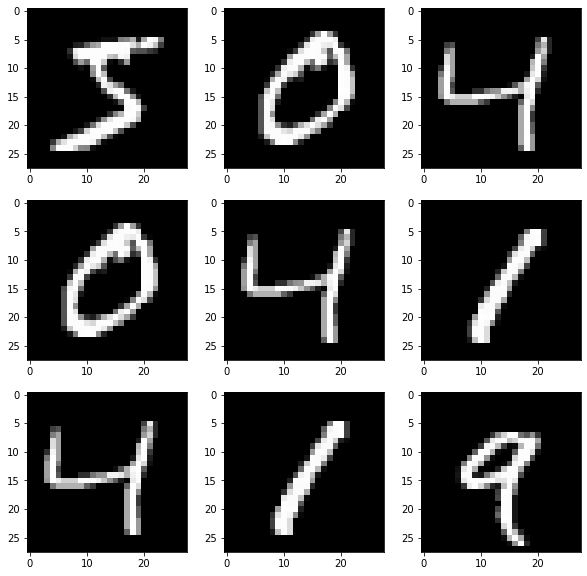

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
  for j in range(3):
    ax[i, j].imshow(x_train[i + j], cmap="gray")

plt.show()

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [10]:
images = tf.keras.layers.Input(shape=x_train[0].shape)
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))(images)
x = tf.keras.layers.Conv2D(16, (3, 3))(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(32, (3, 3))(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)(x)

model = tf.keras.models.Model(images, x)

model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (N

2021-11-06 10:51:38.271596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-06 10:51:38.271711: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
import time

start_time = time.time()

history = model.fit(x=x_train,
                    y=y_train,
                    epochs=50,
                    batch_size=256)

print("\n--- %s seconds ---" % (time.time() - start_time))

2021-11-06 10:51:38.618378: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-06 10:51:38.618541: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-06 10:51:38.722901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6148 - accuracy: 0.8390
Epoch 2/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1812 - accuracy: 0.9479
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1262 - accuracy: 0.9637
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0995 - accuracy: 0.9709
Epoch 5/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0852 - accuracy: 0.9751
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0750 - accuracy: 0.9776
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0685 - accuracy: 0.9801
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0626 - accuracy: 0.9817
Epoch 9/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0581 - accuracy: 0.9832
Epoch 10/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0549 - accura

In [13]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)

print(f'\nTest accuracy: {test_acc}')

 48/313 [===>..........................] - ETA: 0s - loss: 0.0948 - accuracy: 0.9798

2021-11-06 10:53:44.641558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9821

Test accuracy: 0.9821000695228577


In [14]:
predictions = model.predict([x_test])

2021-11-06 10:53:45.760826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


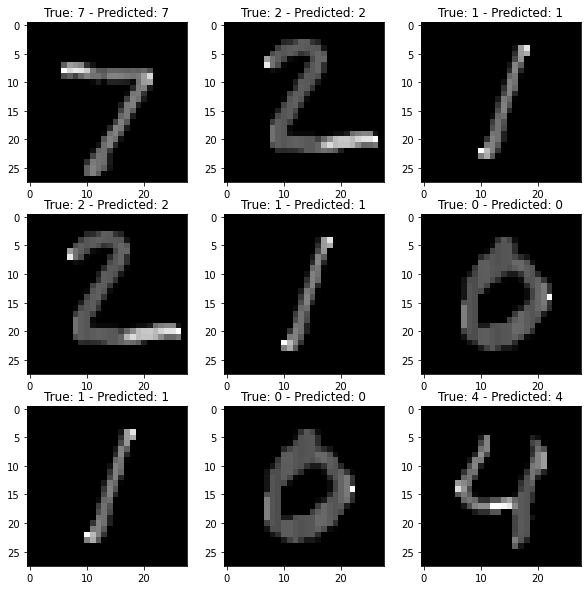

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
  for j in range(3):
    ax[i, j].imshow(x_test[i + j], cmap="gray")
    ax[i, j].set_title(f'True: {y_test[i + j]} - Predicted: {np.argmax(predictions[i + j])}')

plt.show()

In [16]:
try:
  !nvidia-smi
except Exception as e:
  print(e)

zsh:1: command not found: nvidia-smi
